# September 29 - EresNet 34 results

In [1]:
# Default imports
import math
import os
import sys
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.ticker as mtick

# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)
    
# Import the custom plotting module
from plot_utils import plot_utils
import random
import torch
from plot_utils import notebook_utils_2

In [2]:
# Label dict - Dictionary mapping integer labels to str
label_dict = {0:"gamma", 1:"e", 2:"mu"}

np.set_printoptions(threshold=np.inf)

def plot_event(run_id, iteration, mode):
    
    dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"
    
    if mode is "validation":
        np_arr_path = dump_dir + "test_vali_iteration_" + str(iteration) + ".npz"
    else:
        np_arr_path = dump_dir + "iteration_" + str(iteration) + ".npz"
    
    # Load the numpy array
    np_arr = np.load(np_arr_path)
    np_event, np_recon, np_labels, np_energies = np_arr["events"], np_arr["prediction"], np_arr["labels"], np_arr["energies"]

    i = random.randint(0, np_labels.shape[0]-1)
    plot_utils.plot_actual_vs_recon(np_event[i], np_recon[i], 
                                    label_dict[np_labels[i]], np_energies[i].item(),
                                    show_plot=True)

    plot_utils.plot_charge_hist(torch.tensor(np_event).permute(0,2,3,1).numpy(),
                                np_recon, iteration, num_bins=200)
    
def plot_log(run_id, model_name, iteration, variant, mode):

    dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"

    # Setup the path to the training log file
    if mode is "training":
        log = dump_dir + "log_train.csv"
    elif mode is "training_validation":
        log = dump_dir + "val_test.csv"
    elif mode is "validation":
        log = dump_dir + "validation_log.csv"
    else:
        print("mode has to be one of training, training_validation, validation")
        return None
    
    downsample_interval = 32 if mode is "training" else None

    if variant is "AE":
        plot_utils.plot_ae_training([log], [model_name], {model_name:["red"]},
                                 downsample_interval=downsample_interval, show_plot=True, legend_loc=(1.1,1.1))
    elif variant is "VAE":
        plot_utils.plot_vae_training([log], [model_name], {model_name:["red", "blue"]},
                                 downsample_interval=downsample_interval, show_plot=True, legend_loc=(1.1,1.1))
        
    if iteration is not None:
        plot_event(run_id, iteration, mode=mode)
        
def plot_samples(run_id, num_samples, model_dir):
    
    dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"
    np_arr_path = dump_dir + "samples/" + model_dir + "/" + str(num_samples) + "_samples.npy"
    
    np_arr = np.load(np_arr_path)
    i, j = random.randint(0, np_arr.shape[0]-1), random.randint(0, np_arr.shape[0]-1)
    
    plot_utils.plot_actual_vs_recon(np_arr[i], np_arr[j], 
                                    "e", 500,
                                    show_plot=True)
    
    plot_utils.plot_charge_hist(np_arr[i],
                                np_arr[j], 0, num_bins=200)

## EresNet-34 VAE trained for 10.0 epochs

In [4]:
run_id = "20190929_132502"
dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"
np_arr_path = dump_dir + "test_validation_iteration_dump.npz"

# Load the numpy array
np_arr = np.load(np_arr_path)

ValueError: too many values to unpack (expected 2)

In [5]:
np_event, np_recon, np_labels, np_energies = np_arr["events"], np_arr["recon"], np_arr["labels"], np_arr["energies"]

In [12]:
print(np_event.shape)

(255, 1024, 16, 40, 19)


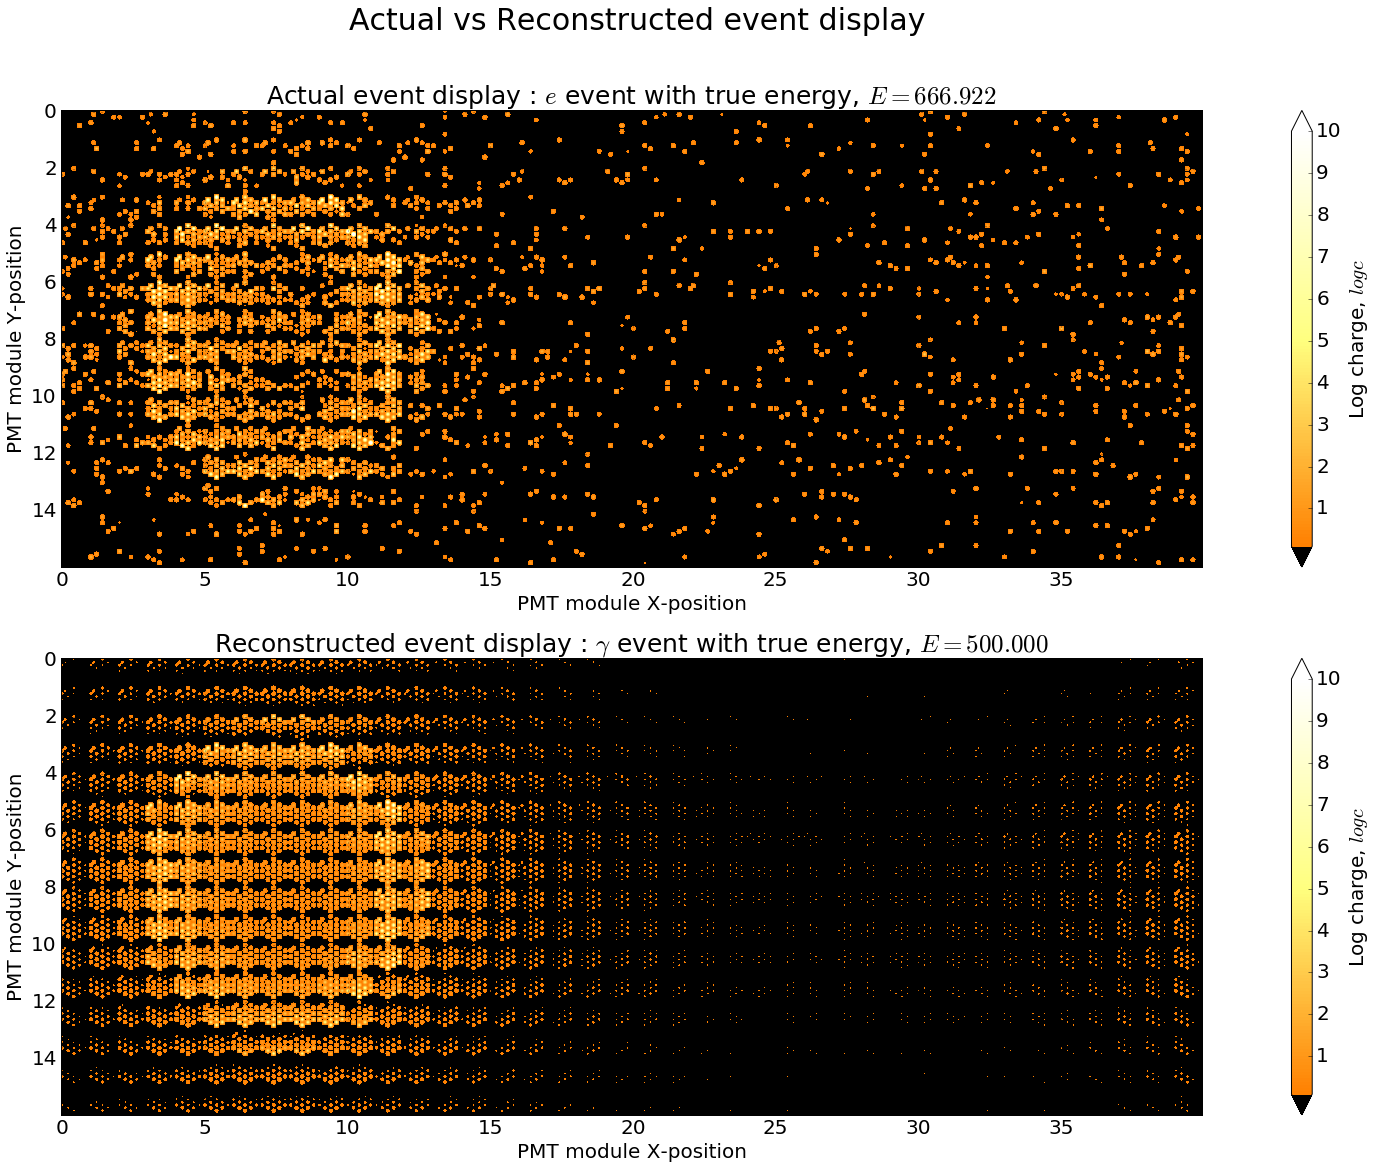

In [21]:
i = random.randint(0, np_labels.shape[0]-1)
j = random.randint(0, np_labels.shape[1]-1)
plot_utils.plot_actual_vs_recon(np_event[i][j], np_recon[i][j], 
                                label_dict[np_labels[i][j].item()], np_energies[i][j].item(),
                                show_plot=True)

## EresNet-34 VAE trained for 30.0 epochs

In [22]:
run_id = "20190929_132330"
dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"
np_arr_path = dump_dir + "test_validation_iteration_dump.npz"

# Load the numpy array
np_arr = np.load(np_arr_path)

In [23]:
np_event, np_recon, np_labels, np_energies = np_arr["events"], np_arr["recon"], np_arr["labels"], np_arr["energies"]

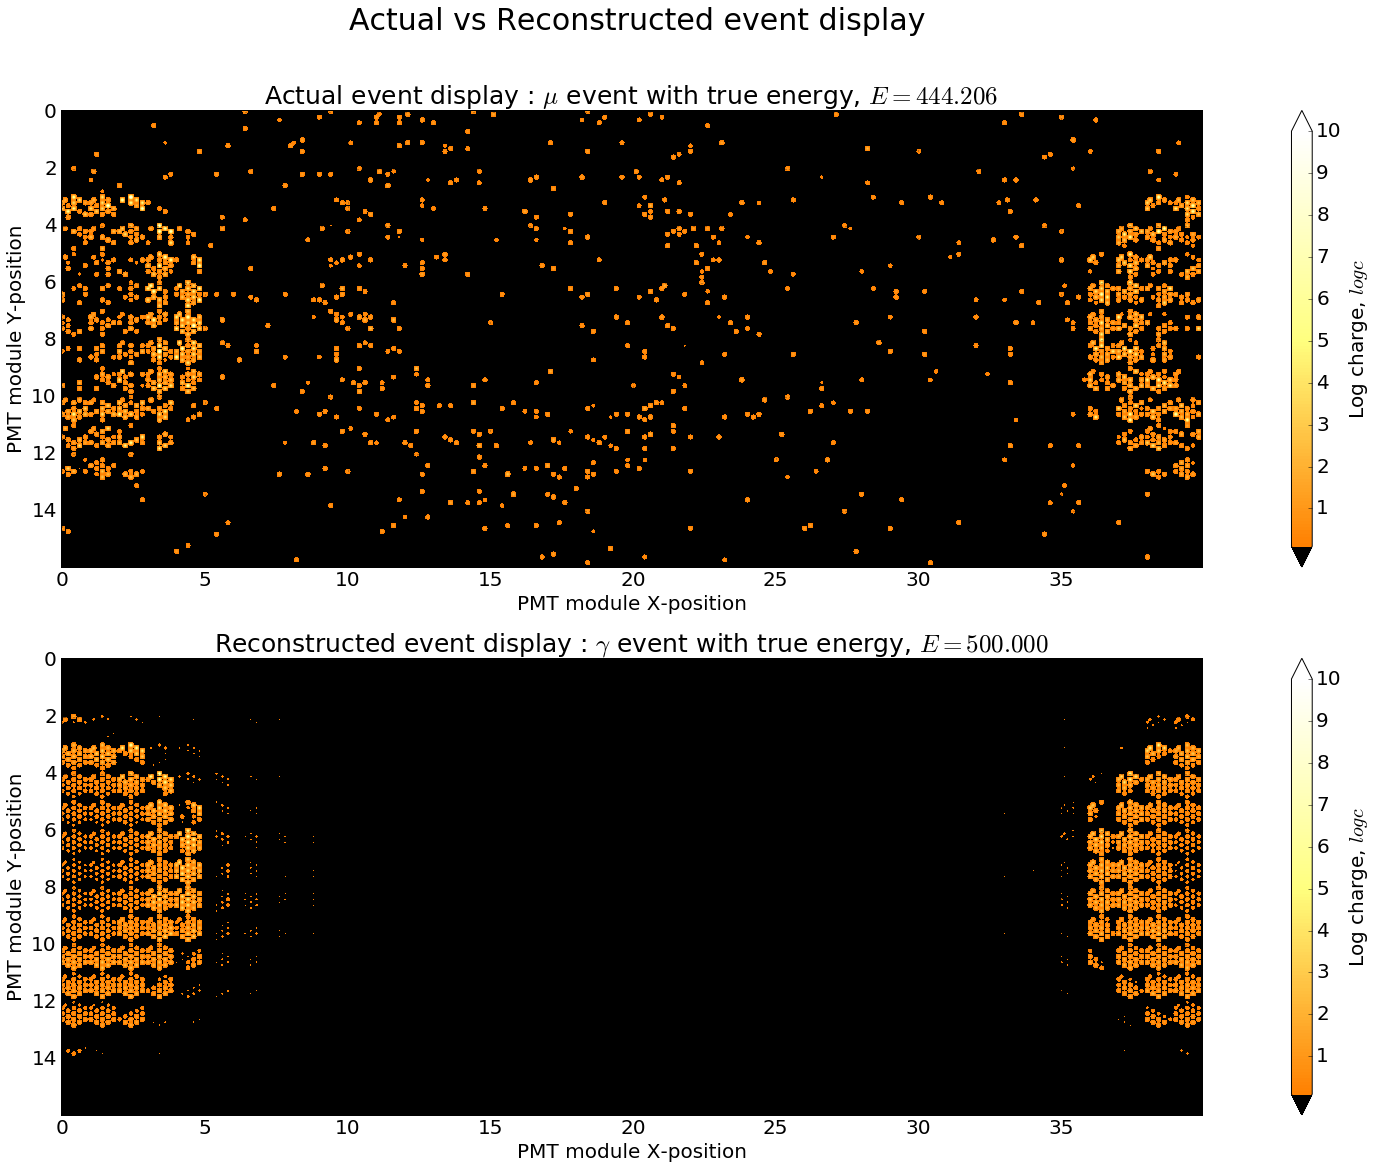

In [26]:
i = random.randint(0, np_labels.shape[0]-1)
j = random.randint(0, np_labels.shape[1]-1)
plot_utils.plot_actual_vs_recon(np_event[i][j], np_recon[i][j], 
                                label_dict[np_labels[i][j].item()], np_energies[i][j].item(),
                                show_plot=True)